In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=6e335e4229467977190d2b2ab65c41da320279cd789ec254b92edee83718458f
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn.functional as F


import medmnist
from medmnist import INFO, Evaluator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is 2. notebook for PneumoniaMNIST Dataset (1 canal)<br>
2 clases <br>train: 4708<br>val: 524<br>test: 624

In [ ]:
#selecting device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


#Loading dataset

In [ ]:
data_flag = 'pneumoniamnist'

download = True

NUM_EPOCHS = 20
BATCH_SIZE = 90

lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [ ]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5],)
    ])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)


# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/4170669 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


#Info + samples

In [ ]:
info

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/record/6496656/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'task': 'binary-class',
 'label': {'0': 'normal', '1': 'pneumonia'},
 'n_channels': 1,
 'n_samples': {'train': 4708, 'val': 524, 'test': 624},
 'license': 'CC BY 4.0'}

In [ ]:
label_array_train = []
for (data, labels) in train_dataset:
  label_array_train.append(labels)
index_values = np.arange(1, len(label_array_train)+1)
column_values = ['class']
  
# creating the train dataframe
df_train = pd.DataFrame(data = label_array_train, 
                  index = index_values, 
                  columns = column_values)

label_array_val = []
for (data, labels) in val_dataset:
  label_array_val.append(labels)
index_values = np.arange(1, len(label_array_val)+1)
column_values = ['class']
  
# creating the val dataframe
df_val = pd.DataFrame(data = label_array_val, 
                  index = index_values, 
                  columns = column_values)

label_array_test = []
for (data, labels) in test_dataset:
  label_array_test.append(labels)
index_values = np.arange(1, len(label_array_test)+1)
column_values = ['class']
  
# creating the test dataframe
df_test = pd.DataFrame(data = label_array_test, 
                  index = index_values, 
                  columns = column_values)

In [ ]:
train_size_arange = np.arange(1, len(label_array_train)+1)
train_1 = sum(df_train["class"]==1)
train_0 = sum(df_train["class"]==0)

val_size_arange = np.arange(1, len(label_array_val)+1)
val_1 = sum(df_val["class"]==1)
val_0 = sum(df_val["class"]==0)

test_size_arange = np.arange(1, len(label_array_test)+1)
test_1 = sum(df_test["class"]==1)
test_0 = sum(df_test["class"]==0)

3494 1214
389 135
390 234


In [ ]:
import plotly.graph_objects as go
sets=['Train Dataset', 'Val Dataset', 'Test Dataset']
fig = go.Figure(data=[
    go.Bar(name='Pneumonia', x=sets, y=[train_1, val_1, test_1]),
    go.Bar(name='No pneumonia', x=sets, y=[train_0, val_0, test_0])]
    )
fig.update_layout(title="Quantity of samples over sets", width=600, height=300,
                  margin=dict(l=00, r=20, b=30, t=40, pad=10),
                  legend=dict(yanchor="top",xanchor="right"))

fig.update_yaxes(title_text='Quantity')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

100%|██████████| 4708/4708 [00:00<00:00, 5120.55it/s]


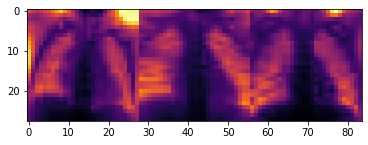

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tr_l = np.array(train_dataset)
tr_l.shape
data_frame = pd.DataFrame()
img = []
for inputs, targets in tqdm(train_dataset):
  img.append(inputs)
  
sample_pics = [img]
pic1 = img[0].reshape(28,-1)
pic2 = img[1].reshape(28,-1)
pic3 = img[2].reshape(28,-1)
plt.imshow(np.hstack((pic1,pic2, pic3)), cmap="inferno_r")

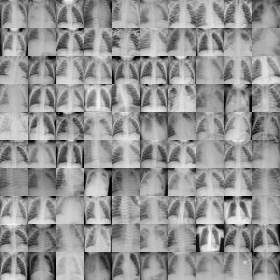

In [ ]:
#or using montage
train_dataset.montage(length=10)

**1) Real chest X-ray**

<img src="https://drive.google.com/uc?export=view&id=1ZIm52DdHTEH9sTe1iSfv-yN9ih8Kk95Z" width=450></img>


# CNN model

In [ ]:
# model class for pneumonia prediction
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv1_bn=nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.conv2_bn=nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 3, 1)
        self.conv3_bn=nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 128, 3, 1)
        self.conv4_bn=nn.BatchNorm2d(128)

        # self.conv5 = nn.Conv2d(128, 180, 3, 1)
        # self.conv5_bn=nn.BatchNorm2d(180)

        self.fc1 = nn.Linear(7*7*128, 800) #((((28-2)/2)-2)/2) = 5,..
        self.fc1_bn=nn.BatchNorm1d(800)

        self.fc2 = nn.Linear(800, 300)
        self.fc2_bn=nn.BatchNorm1d(300)

        self.fc3 = nn.Linear(300, 60)
        self.fc3_bn=nn.BatchNorm1d(60)

        self.fc4 = nn.Linear(60, 2)


    def forward(self, X):
        X = self.conv1(X)
        X = F.relu(self.conv1_bn(X))  #1

        X = F.max_pool2d(X, 2, 2)

        X = self.conv2(X)
        X = F.relu(self.conv2_bn(X))

        X = self.conv3(X)
        X = F.relu(self.conv3_bn(X))  #3

        X = self.conv4(X)
        X = F.relu(self.conv4_bn(X))  #4

        # X = self.conv5(X)
        # X = F.relu(self.conv5_bn(X))  #4

        X = X.view(-1, 7*7*128)

        X = self.fc1(X)
        X = F.relu(self.fc1_bn(X))
        X = self.fc2(X)
        X = F.relu(self.fc2_bn(X))
        X = self.fc3(X)
        X = F.relu(self.fc3_bn(X))
        X = self.fc4(X)
        return F.sigmoid(X) #for binary class.
        #softmax(X, dim=1)

In [ ]:
model = ConvolutionalNetwork().to(device)
loss_function = nn.BCELoss() #for binary class.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=800, bias=True)
  (fc1_bn): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=800, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=

#Training

In [ ]:
def get_accuracy(model, test_loader):
  correct = 0
  total = 0
  with torch.no_grad():
      for (data, labels) in test_loader:
          net_out = model(data) 
          predicted_labels = []
          for row in net_out:
            predicted_labels.append(torch.argmax(row))

          for i, object in enumerate(predicted_labels):
              if predicted_labels[i] == labels[i]:
                correct += 1
              total += 1
  return correct/total

In [ ]:
min_valid_loss = np.inf
MODELPATHAGE = "/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/model_pneumonia.pth"

historical_train_loss = []
historical_validation_loss = []
epochs = []
i = 0
best_acc = 0

for epoch in range(NUM_EPOCHS):
  
  train_loss = 0.0

#  TRAINING
  for (data, labels) in train_loader:
    labels_1hot_t = []
    optimizer.zero_grad()  #cleaning previous gradients
    target = model(data)  #foreward pass
    for l in labels:
      labels_1hot_t.append(np.eye(2)[l])
    loss = loss_function(target, torch.Tensor(labels_1hot_t))
    loss.backward()  #backward pass
    optimizer.step()  #updating weights
    train_loss += loss.item()
    histloss = loss
    i+=1

#  VALIDATION
  validation_loss = 0.0
  model.eval() 

  for (data, labels) in val_loader:
    labels_1hot_v = []
    target = model(data)  #foreward pass
    for l in labels:
      labels_1hot_v.append(np.eye(2)[l])
    loss = loss_function(target, torch.Tensor(labels_1hot_v))
    validation_loss += loss.item()
    hisvloss = loss

  historical_train_loss.append(histloss)
  historical_validation_loss.append(hisvloss)

#  TESTING
  acc = get_accuracy(model, test_loader)
  if acc > best_acc:
    best_acc = acc
    model.to(device)
    torch.save(model, MODELPATHAGE)

  epochs.append(epoch+1)

  print(f'Epoch {epoch + 1}. len: {len(train_loader)}\n\
  Training loss: {round(train_loss,4)}\n\
  Validation loss: {round(validation_loss,4)}\n\
  Accuracy: {round(acc*100,4)}%\n')

Epoch 1. len: 53
  Training loss: 14.3892
  Validation loss: 1.46
  Accuracy: 74.5192%

Epoch 2. len: 53
  Training loss: 6.1621
  Validation loss: 0.6448
  Accuracy: 83.6538%

Epoch 3. len: 53
  Training loss: 4.2661
  Validation loss: 0.5006
  Accuracy: 85.0962%

Epoch 4. len: 53
  Training loss: 3.6001
  Validation loss: 0.7465
  Accuracy: 90.8654%

Epoch 5. len: 53
  Training loss: 2.8882
  Validation loss: 0.5522
  Accuracy: 86.3782%

Epoch 6. len: 53
  Training loss: 2.6114
  Validation loss: 0.4691
  Accuracy: 84.9359%

Epoch 7. len: 53
  Training loss: 1.9794
  Validation loss: 0.4934
  Accuracy: 83.1731%

Epoch 8. len: 53
  Training loss: 1.7802
  Validation loss: 1.6785
  Accuracy: 90.7051%

Epoch 9. len: 53
  Training loss: 2.1044
  Validation loss: 0.8659
  Accuracy: 86.6987%

Epoch 10. len: 53
  Training loss: 1.7284
  Validation loss: 0.6724
  Accuracy: 87.1795%

Epoch 11. len: 53
  Training loss: 1.0956
  Validation loss: 0.6964
  Accuracy: 86.6987%

Epoch 12. len: 53
  

In [ ]:
model_pneumonia = torch.load('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/model_pneumonia.pth')
model_pneumonia.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=800, bias=True)
  (fc1_bn): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=800, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=

In [ ]:
acc = get_accuracy(model_pneumonia, test_loader)
acc

0.9086538461538461

In [ ]:
a = [ loss.detach().numpy() for loss in historical_train_loss]
b = [ loss.detach().numpy() for loss in historical_validation_loss]
t  = np.arange(1, NUM_EPOCHS+1)

In [ ]:
import plotly.graph_objects as go
sets=['Train Dataset', 'Val Dataset', 'Test Dataset']
fig = go.Figure(data=[
    go.Line(name='Train loss', x=t, y=a),
    go.Line(name='Val loss', x=t, y=b)]
    )
fig.update_layout(title="Loss over epochs", width=600, height=300,
                  margin=dict(l=00, r=20, b=30, t=40, pad=10),
                  legend=dict(yanchor="top",xanchor="right"))
fig.update_xaxes(title_text='Epoch')
fig.update_yaxes(title_text='BCEloss')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  DeprecationWarning,


#Single samples prediction

In [ ]:
model_best = ConvolutionalNetwork()
model_best.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/model_pneumonia.pth'))

model.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=800, bias=True)
  (fc1_bn): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=800, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=

In [ ]:
def predict(model, image):
    with torch.no_grad():
        net_out = model(image)  # returns a list,
        predicted_class = torch.argmax(net_out)
        print('net_out: ', net_out)
    return predicted_class.item()

In [ ]:
import skimage
from skimage import io
from skimage.transform import resize

pneumonia_2 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/pneumonia_2.jpeg')
pneumonia_2_resized = resize(pneumonia_2, (28, 28))

pneumonia_1 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/pneumonia_1.jpeg')
pneumonia_1_resized = resize(pneumonia_1, (28, 28))

pneumonia_3 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/pneumonia_3.jpeg')
pneumonia_3_resized = resize(pneumonia_3, (28, 28))

pneumonia_4 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/pneumonia_4.jpeg')
pneumonia_4_resized = resize(pneumonia_4, (28, 28))

no_pneumonia_10 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/no_pneumonia_10.jpeg')
no_pneumonia_10_resized = resize(no_pneumonia_10, (28, 28))

no_pneumonia_11 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/no_pneumonia_11.jpeg')
no_pneumonia_11_resized = resize(no_pneumonia_11, (28, 28))

no_pneumonia_12 = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Med_MNIST_inż/pneumonia_samples/no_pneumonia_12.jpeg')
no_pneumonia_12_resized = resize(no_pneumonia_12, (28, 28))

In [ ]:
train_acc = get_accuracy(model_pneumonia, train_loader)
val_acc = get_accuracy(model_pneumonia, val_loader)
test_acc = get_accuracy(model_pneumonia, test_loader)
print(f'Skuteczności:\n-treningowa: {train_acc},\n-walidacyjna: {val_acc},\n-testowa: {test_acc}.')

Skuteczności:
-treningowa: 0.9626168224299065,
-walidacyjna: 0.9599236641221374,
-testowa: 0.9086538461538461.


In [ ]:
predicted

1

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for (data, labels) in test_loader:
        net_out = model_pneumonia(data) 
        predicted_labels = []
        for row in net_out:
          predicted_labels.append(torch.argmax(row))

        for i, object in enumerate(predicted_labels):
            if predicted_labels[i] == labels[i]:
              correct += 1
            total += 1
acc = correct/total

no_1 = 0
no_0 = 0
for label in predicted_labels:
  if label == 0:
    no_0 += 1
  else:
    no_1 += 1
print(total-correct)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



57


In [ ]:
predicted =  predict(model, torch.Tensor(no_pneumonia_12_resized).reshape(1,1, 28,-1))
predicted

net_out:  tensor([[1.5002e-08, 1.0000e+00]])


1

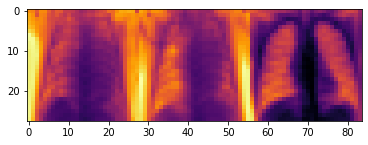

In [ ]:
plt.imshow(np.hstack((pneumonia_1_resized,pneumonia_2_resized, no_pneumonia_2_resized)), cmap="inferno_r")